## **Redes Neurais Não Supervisionadas**

Trabalho de aplicação de uma rede neural não supervisionada para classificação de imagens de Tomografia Computadorizada.

Importando as bibliotecas

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Montando o Drive
from google.colab import drive

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, glob
import re

import PIL
from PIL import Image


Definindo as bases de dados

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Dataset/Bin_Slicev3.xlsx", sheet_name = "Geral")

In [4]:
bin1 = df[['filename','class', 'Bin']].loc[df['Bin'] == 1]
bin2 = df[['filename','class', 'Bin']].loc[df['Bin'] == 2]
bin3 = df[['filename','class', 'Bin']].loc[df['Bin'] == 3]
bin4 = df[['filename','class', 'Bin']].loc[df['Bin'] == 4]
bin5 = df[['filename','class', 'Bin']].loc[df['Bin'] == 5]

In [51]:
def create_dataset(img_folder, dataframe):
   
    img_data_array=[]
    labels=[]
   
    for dir1 in os.listdir(img_folder):
            image_path= os.path.join(img_folder, dir1)
            image= np.array(Image.open(image_path))
            y = dataframe['class'].loc[dataframe['filename'] == dir1]
            labels.append(np.asarray(y[y.index[0]]))
            image=np.resize(image, (128, 128,3))
            image = image.astype('float32') 
            image /= 255 
            img_data_array.append(image)
    return (img_data_array, labels)

In [52]:
(train_images, train_labels) = create_dataset(img_folder=r'/content/drive/MyDrive/Dataset/Bins/Bin1/', 
  dataframe=bin1)

In [53]:
(test_images, test_labels) = create_dataset(img_folder=r'/content/drive/MyDrive/Dataset/Bins/Bin2/', 
  dataframe=bin2)

In [19]:
class_names = ['NORMAL', 'PNEUMONIA', 'COVID-19']

In [20]:
def display_images(images, labels, title = "Default"):
	plt.title(title)
	plt.figure(figsize=(10,10))
	grid_size = min(25, 100)
	for i in range(grid_size):
		plt.subplot(5, 5, i+1)
		plt.xticks([])
		plt.yticks([])
		plt.grid(False)
		plt.imshow(images[i], cmap=plt.cm.binary)
		plt.xlabel(class_names[labels[i]])

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = ( 128, 128 , 3)),
  	keras.layers.Dense(128, activation=tf.nn.relu),
  	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])


In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
train_images = np.array(train_images, np.float32)
test_images = np.array(train_images, np.float32)


In [40]:
train_images.shape

(19280, 32, 32, 3)

In [ ]:
train_labels = np.array(train_labels)
test_labels = np.array(train_labels)

In [42]:
 history = model.fit(train_images, train_labels, epochs=100)

Epoch 1/5
603/603 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.3075
Epoch 2/5
603/603 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.3075
Epoch 3/5
603/603 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.3075
Epoch 4/5
603/603 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.3075
Epoch 5/5
603/603 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.3075


In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


603/603 - 2s - loss: nan - accuracy: 0.3075 - 2s/epoch - 3ms/step

Test accuracy: 0.3075207471847534


In [44]:
predictions = model.predict(test_images)

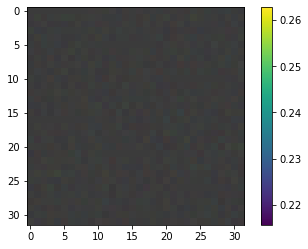

In [45]:
plt.figure()
plt.imshow(test_images[12])
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
predictions[12]


array([nan, nan], dtype=float32)

In [47]:
np.argmax(predictions[4])


0

In [48]:
class_names[np.argmax(predictions[12])]

'NORMAL'

In [49]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


ValueError: ignored

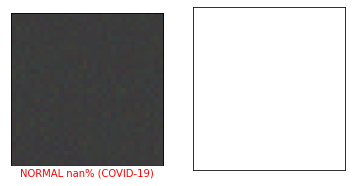

In [50]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


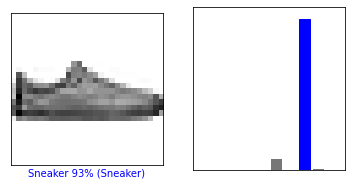

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


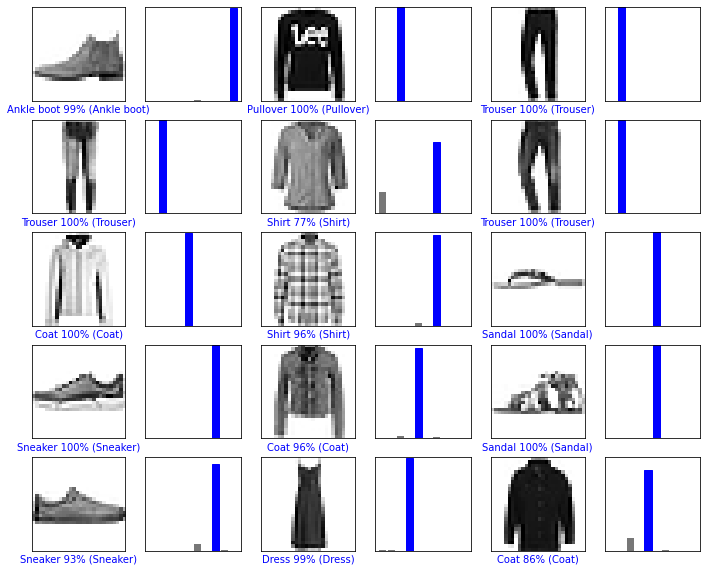

In [ ]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()
